<a href="https://colab.research.google.com/github/sabill/Data_Science_Bootcamp/blob/master/Assignment_3_Advanced_Loan_or_No_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

from imblearn.over_sampling import SMOTE

##Load Dataset

A loan application is used by borrowers to apply for a loan. Through the loan application, borrowers reveal key details about their finances to the lender. The loan application is crucial to determining whether the lender will grant the request for funds or credit. The director of SZE bank identified that going through the loan applications to filter the people who can be granted loans or need to be rejected is a tedious and time-consuming process. He wants to automate it and increase his bank’s efficiency. After talking around a bit, your name pops up as one of the few data scientists who can make this possible within a limited time. Will you help the director out? 

In [86]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


##Data Preparation

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [14]:
loan_data.describe(include='all')

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491.000000,491,481,490,482,491,462,491.000000,491.000000,475.000000,478.000000,448.000000,491,491.000000
unique,NaN,491,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,NaN,1,393,324,276,388,398,NaN,NaN,NaN,NaN,NaN,186,NaN
mean,245.000000,NaN,NaN,NaN,NaN,NaN,NaN,5401.189409,1589.730998,145.014737,341.297071,0.848214,NaN,0.698574
std,141.883755,NaN,NaN,NaN,NaN,NaN,NaN,6419.427177,2919.320624,86.310534,66.964051,0.359214,NaN,0.459345
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,0.000000
25%,122.500000,NaN,NaN,NaN,NaN,NaN,NaN,2923.500000,0.000000,100.000000,360.000000,1.000000,NaN,0.000000
50%,245.000000,NaN,NaN,NaN,NaN,NaN,NaN,3865.000000,1229.000000,126.000000,360.000000,1.000000,NaN,1.000000
75%,367.500000,NaN,NaN,NaN,NaN,NaN,NaN,5705.500000,2251.500000,162.000000,360.000000,1.000000,NaN,1.000000


In [87]:
loan_data.drop(columns=['Unnamed: 0',	'Loan_ID'], inplace=True)

In [16]:
# gender = {'Female':0, 'Male':1}
# loan_data['Gender'] = loan_data['Gender'].map(gender)

# married = {'No':0, 'Yes':1}
# loan_data['Married'] = loan_data['Married'].map(married)

# dependents = {'0':0, '1':1, '2':2,'3':3, '3+':4}
# loan_data['Dependents'] = loan_data['Dependents'].map(dependents)

# edu = {'Not Graduate':0, 'Graduate':1}
# loan_data['Education'] = loan_data['Education'].map(edu)

# self_em = {'No':0, 'Yes':1}
# loan_data['Self_Employed'] = loan_data['Self_Employed'].map(self_em)

# area = {'Semiurban':0, 'Rural':1, 'Urban': 2}
# loan_data['Property_Area'] = loan_data['Property_Area'].map(area)

# loan_data.head()

In [88]:
#Data with null value
loan_data_null = loan_data[loan_data.isnull().any(axis=1)]
loan_data_null.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
6,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,0
11,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0
26,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,0
29,Male,No,0,Not Graduate,No,2699,2785.0,96.0,360.0,NaN,Semiurban,1


In [89]:
#Original Clean Data
loan_data1 = loan_data.dropna()
loan_data1.reset_index(inplace=True)
loan_data1.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
4,5,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,0


In [90]:
ohe1 = OneHotEncoder(handle_unknown='ignore')
loan_data1_ohe = pd.DataFrame(ohe1.fit_transform(loan_data1[['Gender', 'Married',	'Dependents',	'Education','Self_Employed', 'Property_Area']]).toarray())
loan_data1_ohe.head()

# [array(['Female', 'Male', 'Not Specified'], dtype=object),
#  array(['No', 'Not Specified', 'Yes'], dtype=object),
#  array(['0', '1', '2', '3+', 'Not Specified'], dtype=object),
#  array(['Graduate', 'Not Graduate'], dtype=object),
#  array(['No', 'Not Specified', 'Yes'], dtype=object),
#  array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [91]:
ohe1.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [92]:
#conditioned as same as fillna data
origin = [3, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18]
fill = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

ohe_conditioned = loan_data1_ohe.copy()

for idx in origin:
  for num in fill:
    ohe_conditioned[idx] = loan_data1_ohe[num]

for idx in [2, 4, 10, 14]:
  ohe_conditioned[idx] = 0

ohe_conditioned.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,1.0,0.0,0,1.0,0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0
3,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [93]:
ohe_conditioned.shape

(381, 19)

In [94]:
loan_data1 = loan_data1.drop(columns = ['index','Gender', 'Married',	'Dependents',	'Education','Self_Employed', 'Property_Area'], axis=1)
loan_data1.shape

(381, 6)

In [95]:
loan_data1 = loan_data1.join(ohe_conditioned)
loan_data1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4547,0.0,115.0,360.0,1.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,5703,0.0,130.0,360.0,1.0,1,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,4333,2451.0,110.0,360.0,1.0,0,1.0,0.0,0,1.0,0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0
3,6700,1750.0,230.0,300.0,1.0,1,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,4344,736.0,87.0,360.0,1.0,0,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [96]:
loan_data.shape, loan_data1.shape, loan_data_null.shape

((491, 12), (381, 25), (110, 12))

In [97]:
#allocate test data
X_data1 = loan_data1.drop(columns='Loan_Status', axis=1)
# X_data1.head()
y_data1 = loan_data1.Loan_Status
y_data1.head()

0    1
1    1
2    0
3    1
4    0
Name: Loan_Status, dtype: int64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_data1, y_data1, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304, 24), (77, 24), (304,), (77,))

##EDA (Exploratory Data Analysis)

In [99]:
#deal with null data (Gender, Married, Dependent, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History)
null_categorical = ['Gender', 'Married', 'Dependent', 'Self_Employed']
null_numerical = ['LoanAmount',	'Loan_Amount_Term',	'Credit_History']

for column in null_numerical:
  loan_data_null[column] = loan_data_null[column].fillna(loan_data_null[column].mean())

loan_data_null.fillna('Not Specified', inplace=True)

loan_data_null.isna().sum()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
loan_data_null.reset_index(inplace=True)
loan_data_null.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,338.721649,1.000000,Urban,1
1,6,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.000000,0.761194,Semiurban,0
2,11,Male,Yes,Not Specified,Not Graduate,No,3523,3230.0,152.0,360.000000,0.000000,Rural,0
3,26,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,338.721649,0.000000,Semiurban,0
4,29,Male,No,0,Not Graduate,No,2699,2785.0,96.0,360.000000,0.761194,Semiurban,1


In [101]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
X_ohe = pd.DataFrame(ohe2.fit_transform(loan_data_null[['Gender', 'Married',	'Dependents',	'Education','Self_Employed', 'Property_Area']]).toarray())
X_ohe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [102]:
data_df = loan_data_null.drop(columns = ['Gender', 'Married',	'Dependents',	'Education','Self_Employed', 'Property_Area'], axis=1)
concat_data = data_df.join(X_ohe)
concat_data.head()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,4695,0.0,96.0,338.721649,1.000000,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,6,6000,2250.0,265.0,360.000000,0.761194,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,11,3523,3230.0,152.0,360.000000,0.000000,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,26,4755,0.0,95.0,338.721649,0.000000,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,29,2699,2785.0,96.0,360.000000,0.761194,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [103]:
ohe2.categories_

[array(['Female', 'Male', 'Not Specified'], dtype=object),
 array(['No', 'Not Specified', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+', 'Not Specified'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Not Specified', 'Yes'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [153]:
X_concat = concat_data.drop(columns=['Loan_Status','index'])
y_concat = concat_data.Loan_Status
X = X_train.append(X_concat)
y = y_train.append(y_concat)
X = pd.DataFrame(X)
X.head()
#X train data is X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
17,2425,2340.0,143.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,5391,0.0,130.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
151,2507,0.0,56.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,3000,0.0,66.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
47,3417,1750.0,186.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [79]:
y.head()

333    0
336    1
151    1
249    1
135    1
Name: Loan_Status, dtype: int64

In [80]:
X.isna().sum()

ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
0                      0
1                      0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
10                     0
11                     0
12                     0
13                     0
14                     0
15                     0
16                     0
17                     0
18                     0
level_0              304
dtype: int64

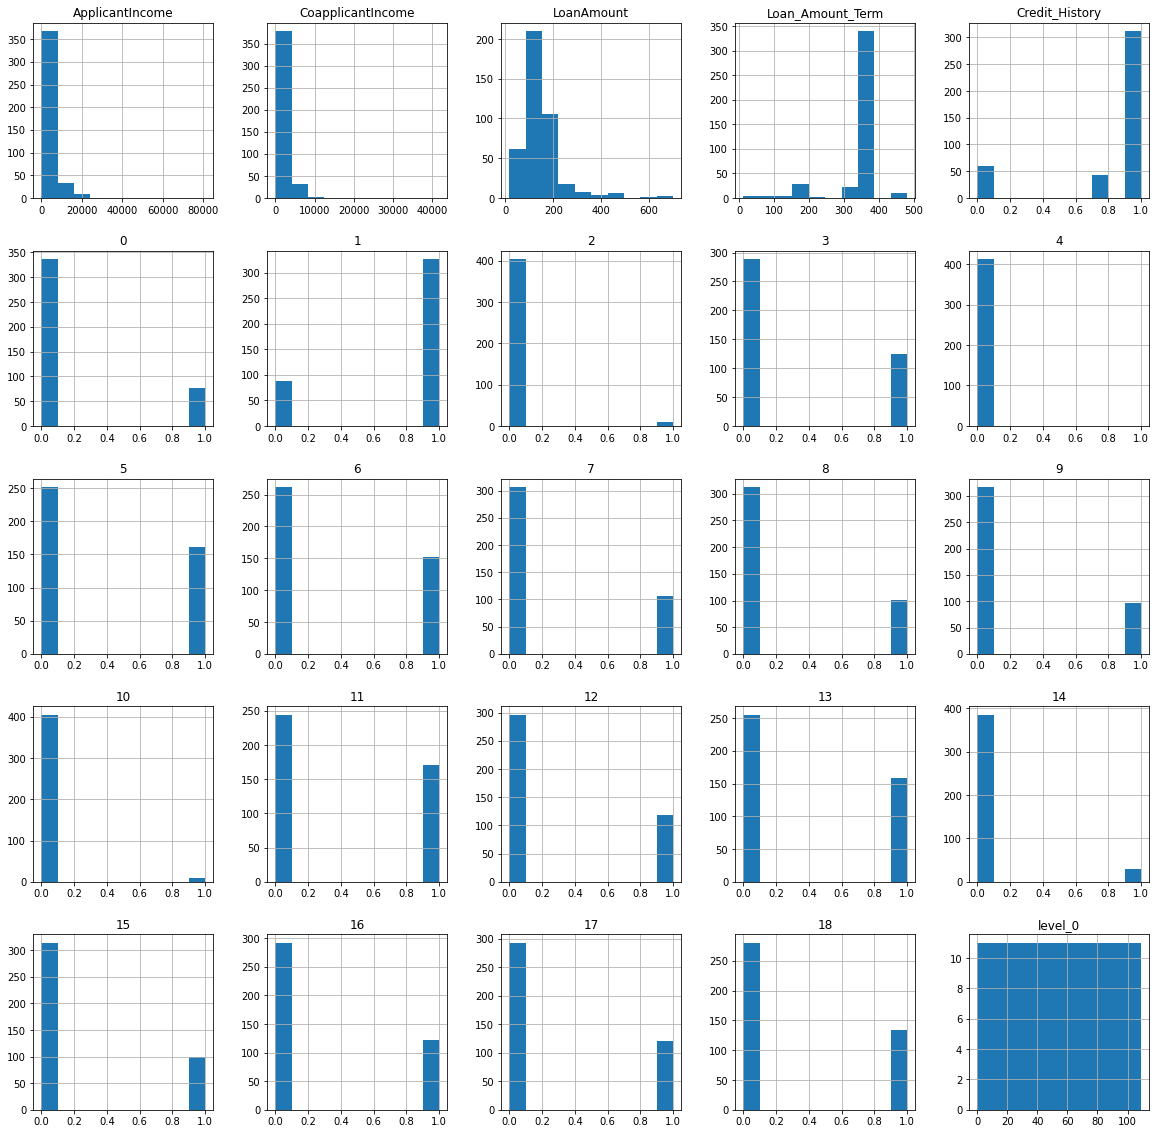

In [81]:
X.hist(figsize=(20,20))
plt.show()

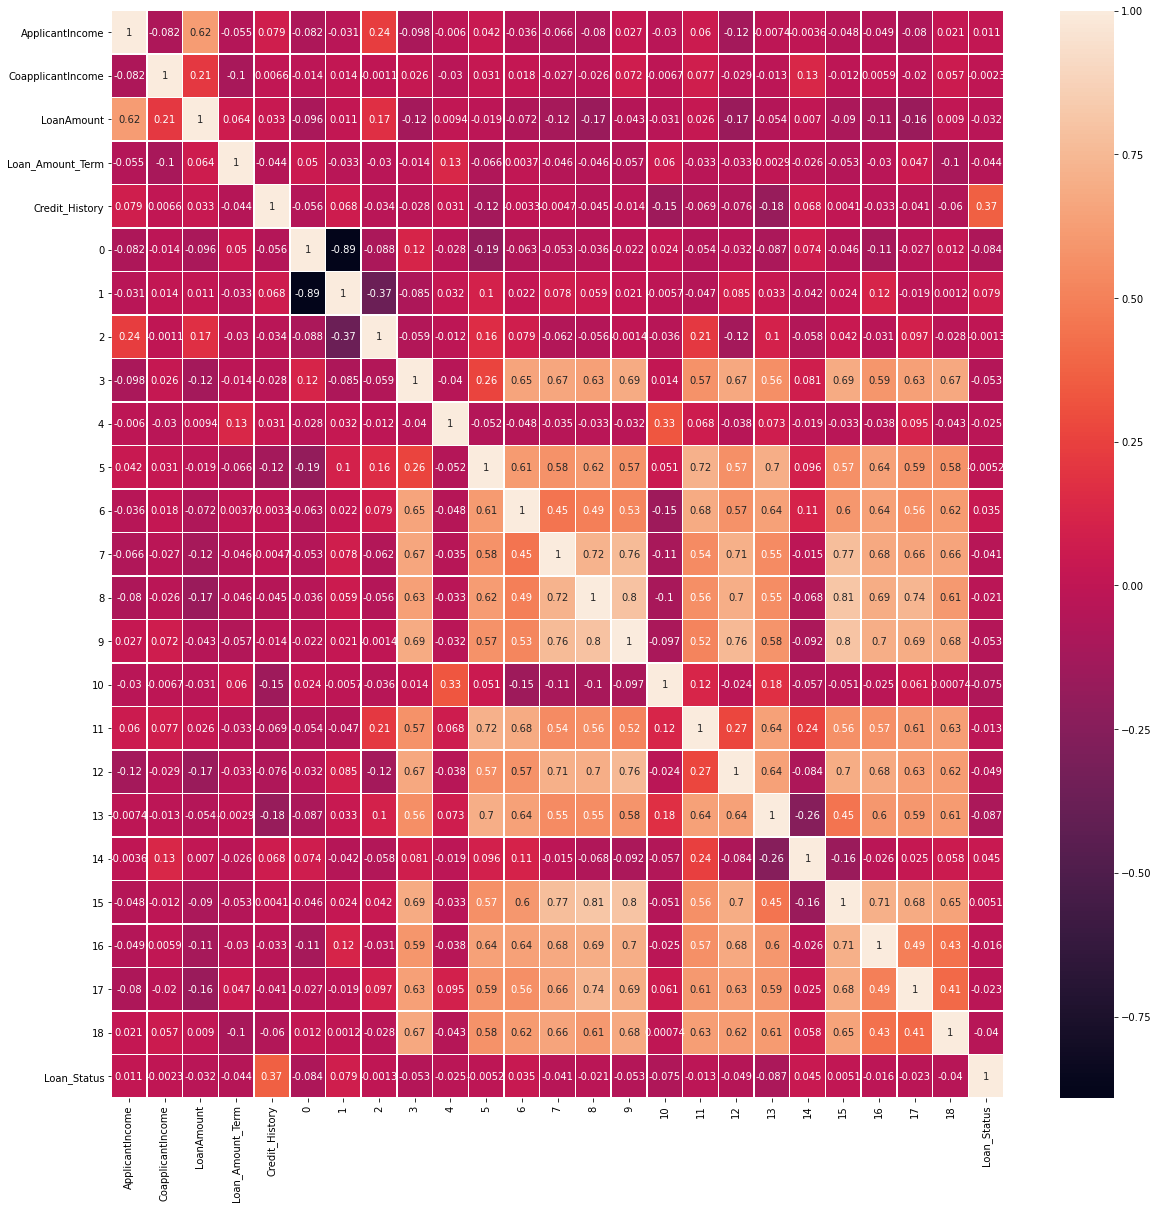

In [ ]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(X.join(y).corr(), annot=True, linewidths=.5)

In [106]:
X.shape, y.shape

((414, 24), (414,))

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


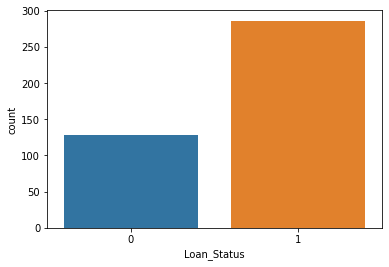

In [107]:
sns.countplot(y,label="Count")

In [154]:
# use smote to equalize the classes on training set splitted in

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=25)
X_train, y_train = sm.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
#X train and y train are X_train y_train

Before OverSampling, counts of label '1': 289
Before OverSampling, counts of label '0': 125 

After OverSampling, the shape of train_X: (578, 24)
After OverSampling, the shape of train_y: (578,) 

After OverSampling, counts of label '1': 289
After OverSampling, counts of label '0': 289


Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


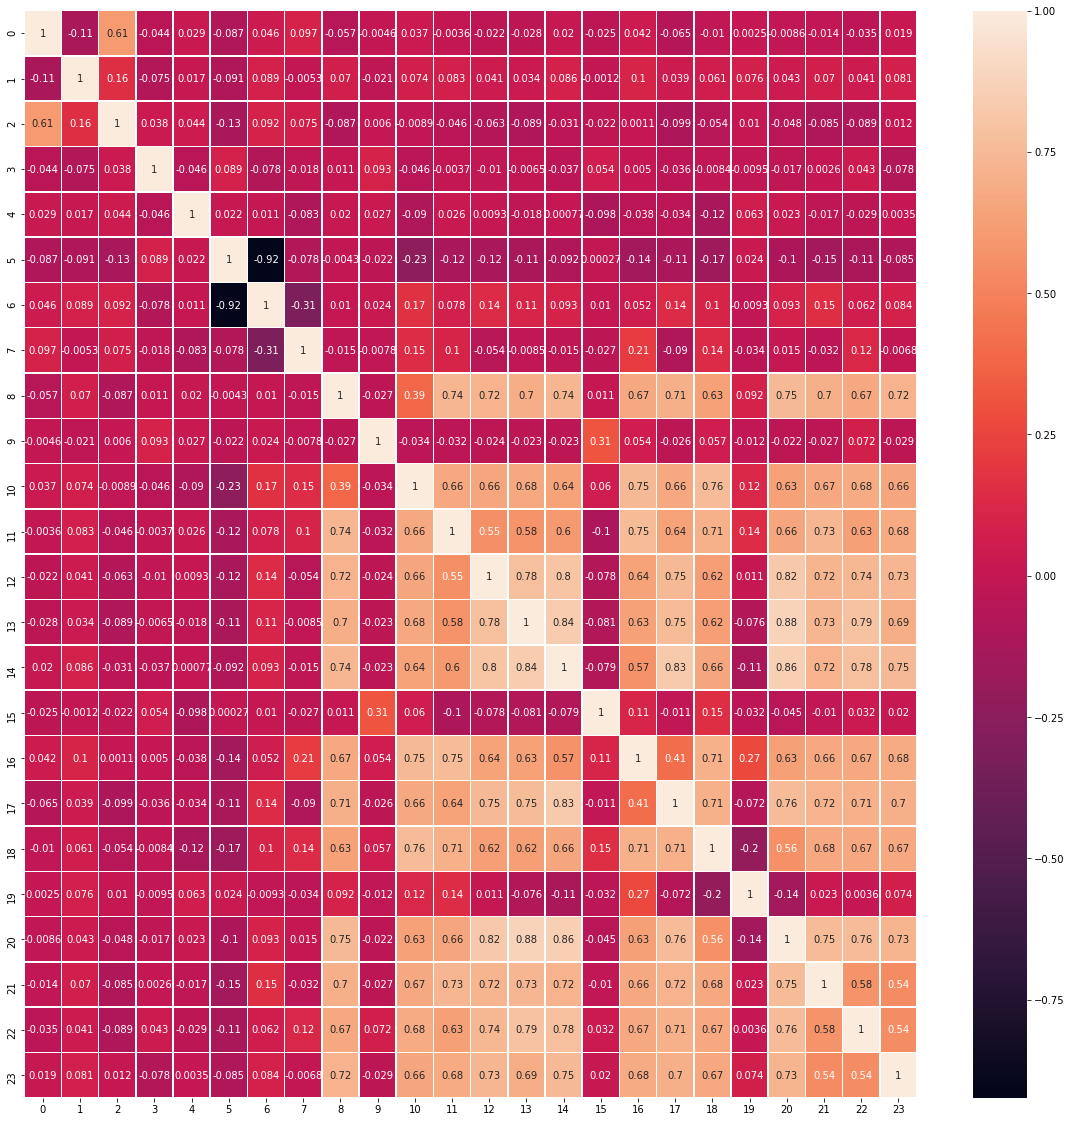

In [121]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(X_train.corr(), annot=True, linewidths=.5)

##Model (ML Algorithm)

In [40]:
# classifier = Sequential()
# #First Hidden Layer
# classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=24))
# classifier.add(Dropout(0.3))
# # Second  Hidden Layer
# classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
# classifier.add(Dropout(0.4))
# #Third  Hidden Layer
# # classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
# # classifier.add(Dropout(0.2))
# #Output Layer
# classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

# classifier.summary()

In [ ]:
# classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
# history = classifier.fit(X_train,y_train, batch_size=10, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
54/54 [==============================] - 1s 8ms/step - loss: 2.4480 - accuracy: 0.5453 - val_loss: 0.7337 - val_accuracy: 0.3684
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 0.9155 - accuracy: 0.4879 - val_loss: 0.6915 - val_accuracy: 0.3333
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.4809 - val_loss: 0.6879 - val_accuracy: 0.3333
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.5408 - val_loss: 0.6825 - val_accuracy: 0.3333
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 0.7350 - accuracy: 0.4756 - val_loss: 0.6814 - val_accuracy: 0.3333
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5119 - val_loss: 0.6806 - val_accuracy: 0.6667
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5090 - val_loss: 0.6819 - val_accuracy: 0.3333
Epoch 8/10
54/54 [==

##Evaluation

In [ ]:
# classifier.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.6034


[0.6968460083007812, 0.6034482717514038]

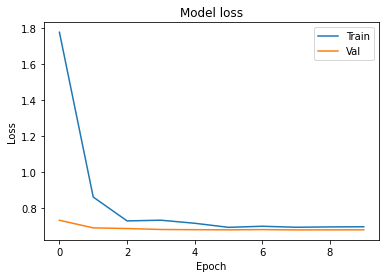

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()

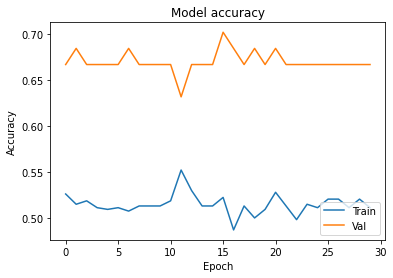

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# # plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()

In [159]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test,y_predict)
f1 = sklearn.metrics.f1_score(y_test, y_predict)
print('Logistic regression accuracy: ', accuracy*100, '%')
print('Logistic regression F1: ', f1*100, '%')



Logistic regression accuracy:  77.92207792207793 %
Logistic regression F1:  86.1788617886179 %


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


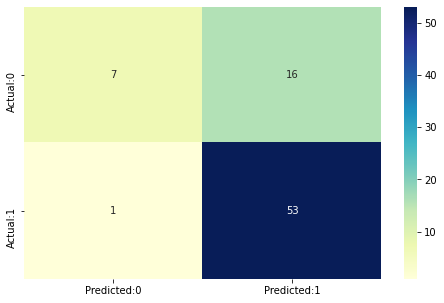

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,y_predict)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [161]:
#Naive bayes Model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict_gnb = gnb.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test,y_predict_gnb)
f1 = sklearn.metrics.f1_score(y_test, y_predict)

print('Naive Bayes accuracy: ', accuracy*100, '%')
print('Naive Bayes F1: ', f1*100, '%')

Naive Bayes accuracy:  76.62337662337663 %
Naive Bayes F1:  86.1788617886179 %


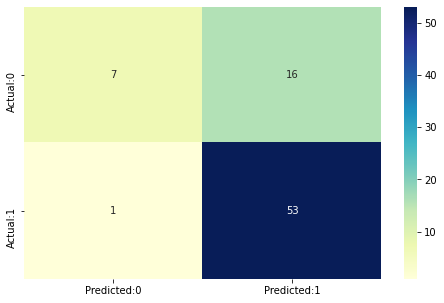

In [162]:
cm = confusion_matrix(y_test,y_predict)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [139]:
X_train

array([[4.34400000e+03, 7.36000000e+02, 8.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.61700000e+03, 0.00000000e+00, 1.07000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.98800000e+03, 0.00000000e+00, 5.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [3.55346664e+03, 0.00000000e+00, 8.87376993e+01, ...,
        0.00000000e+00, 0.00000000e+00, 5.15846621e-01],
       [5.91779891e+03, 4.43990335e+03, 1.76307874e+02, ...,
        5.91971930e-01, 5.91971930e-01, 5.91971930e-01],
       [3.01328559e+03, 0.00000000e+00, 8.56846886e+01, ...,
        1.36194786e-01, 1.00000000e+00, 1.36194786e-01]])

In [177]:
#Drop some column, feature selection
#Currently, data train = X_train, y_train
# data test = X_test, y_test

drop_feature = [1,3,5,9,15]
X_train_new = pd.DataFrame(X_train)
X_train_new.drop(X_train_new.columns[drop_feature], axis = 1, inplace = True)
X_test_new = X_test.copy()
X_test_new.drop(X_test_new.columns[drop_feature], axis = 1, inplace = True)

X_test_new.head()

,ApplicantIncome,LoanAmount,Credit_History,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18
130,3052,100.0,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0
189,2378,46.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
358,3316,88.0,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0
332,37719,152.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
178,4606,81.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [206]:
gnb = GaussianNB()
gnb.fit(X_train_new, y_train)
y_predict = gnb.predict(X_test_new)
accuracy = sklearn.metrics.accuracy_score(y_test,y_predict)
f1 = sklearn.metrics.f1_score(y_test, y_predict)

print('Naive Bayes accuracy: ', accuracy*100, '%')
print('Naive Bayes F1: ', f1*100, '%')

Naive Bayes accuracy:  77.92207792207793 %
Naive Bayes F1:  86.1788617886179 %


In [211]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_new, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_new, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_new, y_test) 

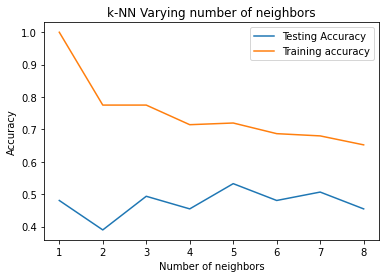

In [212]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [218]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new,y_train)
print(knn.score(X_test_new,y_test))
y_predict = knn.predict(X_test_new)
print(sklearn.metrics.f1_score(y_test, y_predict))

0.5324675324675324
0.6250000000000001


##Hyperparameter Tuning, Feature Selection

In [60]:
from sklearn.feature_selection import VarianceThreshold

In [113]:
selection = VarianceThreshold(threshold=(.7 * (1 - .7)))
X_selection = pd.DataFrame(selection.fit_transform(X_train))
X_selection.head()

,0,1,2,3,4,5
0,7441.0,0.0,194.0,360.0,0.0,0.0
1,8666.0,4983.0,376.0,360.0,0.0,0.0
2,2600.0,2500.0,90.0,360.0,0.0,0.0
3,3762.0,1666.0,135.0,360.0,0.0,0.0
4,1993.0,1625.0,113.0,180.0,0.0,0.0


In [116]:
X_selection.shape

(572, 6)

In [117]:
selection.get_support(indices=True)

array([ 0,  1,  2,  3, 10, 16])

##XAI (Explainable AI)

In [43]:
!pip install shap

     |████████████████████████████████| 327kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463907 sha256=eb9b96ca732238f7c61dbec6873ff2dedad6ca7512de7f95f58e8d5a27d707dd
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [44]:
import shap

In [45]:
explainer = shap.LinearExplainer(model_lr, X_train)
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [46]:
explainer.expected_value

0.2756397313311294

In [47]:
print(y_test.iloc[0], y_predict[0])
print(y_test.iloc[1], y_predict[1])
print(y_test.iloc[2], y_predict[2])
print(y_test.iloc[3], y_predict[3])

1 0
0 0
0 0
1 1


In [48]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [49]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

In [50]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2, :], X_test.iloc[2, :])

In [51]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3, :], X_test.iloc[3, :])

In [52]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:, :], X_test.iloc[:, :])

##Deployment

##Test Data (Submission)

In [179]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [180]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [181]:
test_data.drop(columns='Loan_ID', inplace=True)

for column in null_numerical:
  test_data[column] = test_data[column].fillna(loan_data_null[column].mean())

test_data.fillna('Not Specified', inplace=True)

test_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [182]:
ohe3 = OneHotEncoder(handle_unknown='ignore')
test_ohe = pd.DataFrame(ohe3.fit_transform(test_data[['Gender', 'Married',	'Dependents',	'Education','Self_Employed', 'Property_Area']]).toarray())
test_ohe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [183]:
test_join = test_data.drop(columns = ['Gender', 'Married',	'Dependents',	'Education','Self_Employed', 'Property_Area'], axis=1)
test = test_join.join(test_ohe)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3748,1668.0,110.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4000,7750.0,290.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2625,6250.0,187.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3902,1666.0,109.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6096,0.0,218.0,360.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [184]:
test_new = test.copy()
test_new.drop(test_new.columns[drop_feature], axis = 1, inplace = True)
test_new.head()

,ApplicantIncome,LoanAmount,Credit_History,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18
0,3748,110.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4000,290.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2625,187.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3902,109.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6096,218.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [219]:
prediction = gnb.predict(test_new)

In [220]:
predict = pd.DataFrame(prediction, columns=['prediction'])
predict.isna().sum()

prediction    0
dtype: int64

In [221]:
predict

,prediction
0,1
1,1
2,1
3,1
4,0
...,...
118,1
119,1
120,1
121,1


In [222]:
predict.to_csv('loan_noloan.csv', index=False)

In [223]:
predict.nunique().sum()

2